<a href="https://colab.research.google.com/github/kyleishaumbay/Umbay-Hierro-CSCI-161.03-UV2/blob/main/%5BUmbay%26Hierro%5D_3_2_Static_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [1]:
!pip install gensim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gensim

# Load data

In [3]:
corpus = pd.read_csv('https://raw.githubusercontent.com/kyleishaumbay/Umbay-Hierro-CSCI-161.03-UV2/main/datasets/elonmusk_cleaned_corpus.csv')
corpus.head()

,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
0,Taibbi is a journalist paid and bought by bill...,https://www.youtube.com/watch?v=BB__743Jfm0&lc...,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,0,NaN,youtube,Taibbi journalist billionaire I SB Taibi usefu...
1,@@margobarranti Hello dear... I really appreci...,https://www.youtube.com/watch?v=kzlUyrccbos&lc...,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,0,Ugy6M6SUBHCUtkU3RSh4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
2,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,0,UgzYT3Etk-P5otJtTKF4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
3,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,0,UgyIKvl9rpFtLHpw6Ul4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...
4,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,0,UgyB14bghklGyJpGm2N4AaABAg,youtube,Hello dear I appreciate comment I touch Send d...


##Remove Stopwords

Stopwords like 'the', 'a', 'is', etc., are common words that don't usually carry much meaning. Removing them helps to focus on the more significant words in our text data.

In [4]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Add 'musk' to the stopwords list
stop_words.add('musk')

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        # Convert to lowercase before removing stopwords
        return ' '.join([word for word in text.lower().split() if word not in stop_words])
    return text

# Apply the function to the 'cleaned_text' column
corpus['cleaned_text'] = corpus['cleaned_text'].apply(remove_stopwords)

# Display the updated dataframe
corpus.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
0,Taibbi is a journalist paid and bought by bill...,https://www.youtube.com/watch?v=BB__743Jfm0&lc...,2025-09-09 20:34:11,Taibbi is a journalist paid and bought by bill...,0,NaN,youtube,taibbi journalist billionaire sb taibi useful ...
1,@@margobarranti Hello dear... I really appreci...,https://www.youtube.com/watch?v=kzlUyrccbos&lc...,2025-09-09 20:26:01,@@margobarranti Hello dear... I really appreci...,0,Ugy6M6SUBHCUtkU3RSh4AaABAg,youtube,hello dear appreciate comment touch send direc...
2,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:05:41,Hello dear... I really appreciate your likes a...,0,UgzYT3Etk-P5otJtTKF4AaABAg,youtube,hello dear appreciate comment touch send direc...
3,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:40,Hello dear... I really appreciate your likes a...,0,UgyIKvl9rpFtLHpw6Ul4AaABAg,youtube,hello dear appreciate comment touch send direc...
4,Hello dear... I really appreciate your likes a...,https://www.youtube.com/watch?v=oO8w6XcXJUs&lc...,2025-09-09 20:04:28,Hello dear... I really appreciate your likes a...,0,UgyB14bghklGyJpGm2N4AaABAg,youtube,hello dear appreciate comment touch send direc...


# Static Word Embedding

In [5]:
# Tokenize the text, filtering out 'nan'
corpus['tokenized_text'] = corpus['cleaned_text'].astype(str).apply(lambda x: x.split() if x != 'nan' else [])

In [6]:
display(
  corpus['cleaned_text'].head()
)

display(
  corpus['tokenized_text'].head()
)

,cleaned_text
0,taibbi journalist billionaire sb taibi useful ...
1,hello dear appreciate comment touch send direc...
2,hello dear appreciate comment touch send direc...
3,hello dear appreciate comment touch send direc...
4,hello dear appreciate comment touch send direc...


,tokenized_text
0,"[taibbi, journalist, billionaire, sb, taibi, u..."
1,"[hello, dear, appreciate, comment, touch, send..."
2,"[hello, dear, appreciate, comment, touch, send..."
3,"[hello, dear, appreciate, comment, touch, send..."
4,"[hello, dear, appreciate, comment, touch, send..."


In [7]:
# Train the word2vec model, filtering out empty lists
model = gensim.models.Word2Vec([tokens for tokens in corpus['tokenized_text'] if tokens],
                               vector_size=100,  # Dimension of the word vectors
                               min_count=1,    # Ignores all words with total frequency lower min_count
                               sg=0,           # Training algorithm: 0 for CBOW; 1 for Skip-gram
                               window=5,       # Maximum distance between the current & predicted word within a sentence
                               workers=4,      # Number of workers to use for training
                               epochs=10       # Number of iterations over the corpus
                               )

model.save('word2vec.model')

## Inspecting the word2vec

In [8]:
# Load the model
model = gensim.models.Word2Vec.load('word2vec.model')

# Get vectors from the model
vectors = model.wv

### Number of word vectors generated

In [9]:
# Number of word vectors generated (columns)
len(vectors)

7828

### List of words / tokens sorted by most frequent

In [10]:
# List of words / tokens sorted by most frequent
vectors.index_to_key
vectors.index_to_key[:10]  # Top 10 words

['elon',
 'trump',
 'party',
 'tesla',
 'world',
 'money',
 'human',
 'u',
 'america',
 'president']

### Similarity between two words

In [11]:
# The similarity method returns a score of how similar the vectors of two words are. The closer the score is to 1, the higher the similarity. The closer to 0, the lower the similarity.
vectors.similarity('elon', 'trump')

0.99975234

In [12]:
# The similarity method returns a score of how similar the vectors of two words are. The closer the score is to 1, the higher the similarity. The closer to 0, the lower the similarity.
vectors.similarity('elon', 'party')

0.9991234

In [13]:
# The similarity method returns a score of how similar the vectors of two words are. The closer the score is to 1, the higher the similarity. The closer to 0, the lower the similarity.
vectors.similarity('party', 'trump')

0.9991031

### Distance between two words

In [14]:
# The distance method is the opposite of the similarity method; it returns how dissimilar the vectors of two words are. The closer the score is to 1, the higher the distance and the lower the similarity. The closer to 0, the lower the distance and the higher the similarity.
vectors.distance('elon', 'trump')

0.00024765729904174805

In [15]:
# The distance method is the opposite of the similarity method; it returns how dissimilar the vectors of two words are. The closer the score is to 1, the higher the distance and the lower the similarity. The closer to 0, the lower the distance and the higher the similarity.
vectors.distance('elon', 'party')

0.0008766055107116699

In [16]:
# The distance method is the opposite of the similarity method; it returns how dissimilar the vectors of two words are. The closer the score is to 1, the higher the distance and the lower the similarity. The closer to 0, the lower the distance and the higher the similarity.
vectors.distance('party', 'trump')

0.0008968710899353027

### Most similar & dissimilar to the given words

# **1. Most similar words (Using Static Word Embedding) from the top occurring words (max of 3 words, from Term-Frequency Language Model).**

This section identifies and displays the words that are most similar in meaning to the top 3 most frequent words found in the corpus.

In [17]:
# The most_similar method returns words whose vectors are most similar to the given word.
vectors.most_similar('elon', topn=10)

[('trump', 0.9997523427009583),
 ('u', 0.9997217655181885),
 ('human', 0.9996879696846008),
 ('country', 0.9996721744537354),
 ('tesla', 0.999667227268219),
 ('world', 0.9996666312217712),
 ('ai', 0.9996572136878967),
 ('company', 0.9996161460876465),
 ('may', 0.9995981454849243),
 ('government', 0.9995905160903931)]

In [18]:
# The most_similar method returns words whose vectors are most similar to the given word.
vectors.most_similar('trump', topn=10)

[('elon', 0.9997523427009583),
 ('u', 0.9996601343154907),
 ('tesla', 0.999649703502655),
 ('also', 0.9996361136436462),
 ('human', 0.9996134638786316),
 ('world', 0.9996072053909302),
 ('country', 0.9996017813682556),
 ('happen', 0.9995865225791931),
 ('government', 0.9995805621147156),
 ('ai', 0.9995603561401367)]

In [19]:
# The most_similar method returns words whose vectors are most similar to the given word.
vectors.most_similar('party', topn=10)

[('new', 0.9994332194328308),
 ('america', 0.9993443489074707),
 ('american', 0.9993326663970947),
 ('country', 0.9992889165878296),
 ('political', 0.9992655515670776),
 ('world', 0.9992629289627075),
 ('u', 0.9991500377655029),
 ('two', 0.9991481304168701),
 ('elon', 0.9991234540939331),
 ('politics', 0.9991158246994019)]

In [20]:
# Output the words whose vectors are most similar and dissimilar to the given words.
vectors.most_similar(
  positive=['elon'],  # most similar to these words and
  negative=['trump'],  # most dissimilar to these word
  topn=10
)

[('caught', 0.2683079242706299),
 ('softball', 0.2587355077266693),
 ('korea', 0.249346062541008),
 ('bureaucrat', 0.24096837639808655),
 ('dictating', 0.24088232219219208),
 ('czekam', 0.2406722903251648),
 ('elonreevemusk', 0.22468137741088867),
 ('aspirational', 0.22239719331264496),
 ('dytopian', 0.22222274541854858),
 ('scammer', 0.2202211618423462)]

In [21]:
# Output the words whose vectors are most similar and dissimilar to the given words.
vectors.most_similar(
  positive=['trump'],  # most similar to these words and
  negative=['elon'],  # most dissimilar to these word
  topn=10
)

[('irk', 0.3163606822490692),
 ('despyes', 0.308842271566391),
 ('subbed', 0.27439627051353455),
 ('esos', 0.27132025361061096),
 ('margin', 0.2657189667224884),
 ('install', 0.25860893726348877),
 ('misssd', 0.24901169538497925),
 ('yyo', 0.24897126853466034),
 ('knot', 0.2405329793691635),
 ('alingment', 0.2316112071275711)]

In [22]:
# Output the words whose vectors are most similar and dissimilar to the given words.
vectors.most_similar(
  positive=['elon'],  # most similar to these words and
  negative=['party'],  # most dissimilar to these word
  topn=10
)

[('shave', 0.30829131603240967),
 ('bros', 0.27594420313835144),
 ('bitch', 0.272441565990448),
 ('schwab', 0.26247653365135193),
 ('recover', 0.26000159978866577),
 ('yanhahahha', 0.25343337655067444),
 ('fools', 0.24935577809810638),
 ('prank', 0.24133671820163727),
 ('copyright', 0.23741185665130615),
 ('mistreat', 0.23622657358646393)]

In [23]:
# Output the words whose vectors are most similar and dissimilar to the given words.
vectors.most_similar(
  positive=['party'],  # most similar to these words and
  negative=['elon'],  # most dissimilar to these word
  topn=10
)

[('ws', 0.3320653438568115),
 ('kimball', 0.2717799246311188),
 ('hawking', 0.24837535619735718),
 ('alright', 0.24226468801498413),
 ('cartoon', 0.23661969602108002),
 ('steering', 0.2326505333185196),
 ('superb', 0.22571246325969696),
 ('asymmetric', 0.2146836370229721),
 ('activism', 0.21195489168167114),
 ('boeing', 0.20821090042591095)]

In [24]:
# Output the words whose vectors are most similar and dissimilar to the given words.
vectors.most_similar(
  positive=['party'],  # most similar to these words and
  negative=['trump'],  # most dissimilar to these word
  topn=10
)

[('ws', 0.3287975490093231),
 ('roblox', 0.30774030089378357),
 ('hawking', 0.3038850724697113),
 ('tyson', 0.2747548818588257),
 ('kimball', 0.26037493348121643),
 ('indeed', 0.24769876897335052),
 ('whhat', 0.23264573514461517),
 ('caught', 0.22873498499393463),
 ('cartoon', 0.2258778214454651),
 ('liz', 0.22553037106990814)]

In [25]:
# Output the words whose vectors are most similar and dissimilar to the given words.
vectors.most_similar(
  positive=['trump'],  # most similar to these words and
  negative=['party'],  # most dissimilar to these word
  topn=10
)

[('bitch', 0.36078333854675293),
 ('teqq', 0.30955445766448975),
 ('shave', 0.28429898619651794),
 ('recover', 0.27089908719062805),
 ('puenso', 0.26759859919548035),
 ('mistreat', 0.26140880584716797),
 ('chapterme', 0.24544744193553925),
 ('silverware', 0.23716525733470917),
 ('yanhahahha', 0.236636221408844),
 ('mw', 0.2293487787246704)]

### Word that is least like the other given words

In [26]:
odd_one_out_words = "elon trump party"
odd_one_out_words = odd_one_out_words.split()
vectors.doesnt_match(odd_one_out_words)

'party'

In [27]:
context_words = "elon"
context_words = context_words.split()
model.predict_output_word(context_words, topn=5)

[('teqq', 0.0001872109),
 ('til', 0.0001864767),
 ('maded', 0.00018605961),
 ('deadlines', 0.00018558608),
 ('clase', 0.00018542932)]

In [28]:
context_words = "trump"
context_words = context_words.split()
model.predict_output_word(context_words, topn=5)

[('teqq', 0.00018551316),
 ('til', 0.00018479479),
 ('maded', 0.00018438522),
 ('deadlines', 0.0001839346),
 ('clase', 0.0001837946)]

In [29]:
context_words = "party"
context_words = context_words.split()
model.predict_output_word(context_words, topn=5)

[('teqq', 0.00017771152),
 ('til', 0.00017713325),
 ('maded', 0.00017678815),
 ('deadlines', 0.00017645098),
 ('clase', 0.00017629964)]

## Plotting vectors

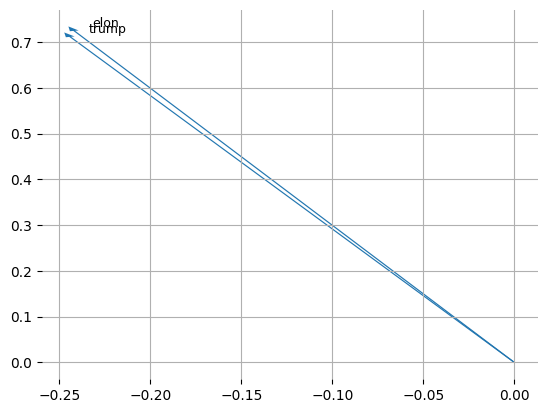

In [30]:
# Plot word vectors
def plot_vectors(vectors, words):
  # Create a figure and a 2D Axes
  fig, ax = plt.subplots()

  for word in words:
    # Get the vector for the word
    vector = vectors[word]

    # Plot the word near the arrow head
    ax.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=9)
    # Plot the vector
    ax.arrow(
      0,                      # Start x
      0,                      # Start y
      vector[0],              # End x
      vector[1],              # End y
      # head_width=0.05,      # Arrow head width
      # head_length=0.1       # Arrow head length
      head_width=0.05 * 0.1,  # Arrow head width
      head_length=0.1 * 0.1,  # Arrow head length
      lw=0.01,                # Arrow line width
      # fc='r',                 # Arrow fill color
      # ec='r'                  # Arrow edge color
    )

  # Remove border around the plot
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)

  plt.grid()

  # Display the plot
  plt.show()


plot_vectors(vectors, vectors.index_to_key[:2])

## Plotting with Principal Component Analysis (PCA)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [32]:
# Words most similar to 'elon'
vectors.most_similar('elon', topn=5)
word_set1 = [word for word, score in vectors.most_similar('elon', topn=5)]
word_set1

['trump', 'u', 'human', 'country', 'tesla']

In [33]:
# Words most similar to 'scam'
vectors.most_similar('trump', topn=5)
word_set2 = [word for word, score in vectors.most_similar('trump', topn=5)]
word_set2

['elon', 'u', 'tesla', 'also', 'human']

In [34]:
# Words most similar to 'scam'
vectors.most_similar('party', topn=5)
word_set3 = [word for word, score in vectors.most_similar('party', topn=5)]
word_set3

['new', 'america', 'american', 'country', 'political']

In [35]:
words_to_viz = word_set1 + word_set2 + word_set3
words_to_viz

['trump',
 'u',
 'human',
 'country',
 'tesla',
 'elon',
 'u',
 'tesla',
 'also',
 'human',
 'new',
 'america',
 'american',
 'country',
 'political']

In [36]:
vecs_to_viz = [vectors[word] for word in words_to_viz]
vecs_to_viz

[array([-0.2441223 ,  0.7113803 ,  0.30453655, -0.04824951,  0.13432205,
        -0.7933985 ,  0.00153358,  1.2381603 , -0.3370511 , -0.227231  ,
        -0.3001971 , -0.77007675, -0.26125488,  0.23461361,  0.17014264,
        -0.5629939 ,  0.09250721, -0.6569698 ,  0.11046464, -1.1832186 ,
         0.13931467,  0.38355318,  0.5643044 , -0.214055  , -0.12358209,
         0.09061624, -0.26220977, -0.23879018, -0.6223494 ,  0.00869856,
         0.60621274,  0.00484883, -0.14164509, -0.40730992, -0.15581739,
         0.53180486,  0.1146162 , -0.41824907, -0.2259515 , -0.9434004 ,
         0.05994035, -0.5469509 , -0.31223974, -0.05666431,  0.4565239 ,
        -0.3193352 , -0.39657196,  0.21809138,  0.00339157,  0.48330748,
         0.147558  , -0.5835651 , -0.3984785 , -0.03966018, -0.45092332,
         0.31681043,  0.48798305, -0.01001082, -0.38109052,  0.10656825,
         0.23698877,  0.40417987, -0.31310254,  0.14237697, -0.42040715,
         0.43836692,  0.2575897 ,  0.30441114, -0.4

In [37]:
pca = PCA(n_components=2)
vecs_PCA = pca.fit_transform(vecs_to_viz)
vecs_PCA

array([[ 7.68253464e-01,  2.04206984e-02],
       [ 3.66083428e-01, -3.45805957e-03],
       [ 1.78834234e-01, -3.64753031e-02],
       [-6.35190690e-02,  5.12736509e-02],
       [ 3.56975668e-01, -3.29111445e-02],
       [ 8.89259745e-01,  1.89362330e-02],
       [ 3.66083428e-01, -3.45805957e-03],
       [ 3.56975668e-01, -3.29111445e-02],
       [-2.09359488e-01, -7.39240691e-03],
       [ 1.78834234e-01, -3.64753031e-02],
       [-3.35961321e-01,  3.53688941e-02],
       [-8.70769283e-01, -1.11786205e-03],
       [-6.97055383e-01, -1.09781732e-02],
       [-6.35190690e-02,  5.12736509e-02],
       [-1.22111626e+00, -1.20956709e-02]])

In [38]:
vecs_PCA_df = pd.DataFrame(columns=['word', 'association', 'PC1', 'PC2'])

for idx in range(len(words_to_viz)):
  word = words_to_viz[idx]
  if word in word_set1:
    association = 'elon'
  elif word in word_set2:
    association = 'trump'
  elif word in word_set3:
    association = 'party'
  else:
    association = 'unknown' # Or some other default

  PC1 = vecs_PCA[idx, 0]
  PC2 = vecs_PCA[idx, 1]
  new_row = [word, association, PC1, PC2]

  vecs_PCA_df.loc[len(vecs_PCA_df)] = new_row

vecs_PCA_df

,word,association,PC1,PC2
0,trump,elon,0.768253,0.020421
1,u,elon,0.366083,-0.003458
2,human,elon,0.178834,-0.036475
3,country,elon,-0.063519,0.051274
4,tesla,elon,0.356976,-0.032911
5,elon,trump,0.889260,0.018936
6,u,elon,0.366083,-0.003458
7,tesla,elon,0.356976,-0.032911
8,also,trump,-0.209359,-0.007392
9,human,elon,0.178834,-0.036475


In [39]:
# Train the word2vec model, filtering out empty lists
model = gensim.models.Word2Vec([tokens for tokens in corpus['tokenized_text'] if tokens],
                               vector_size=100,  # Dimension of the word vectors
                               min_count=1,    # Ignores all words with total frequency lower min_count
                               sg=0,           # Training algorithm: 0 for CBOW; 1 for Skip-gram
                               window=5,       # Maximum distance between the current & predicted word within a sentence
                               workers=4,      # Number of workers to use for training
                               epochs=10       # Number of iterations over the corpus
                               )

model.save('word2vec.model')

# **2. PCA of the words from the top 3 words (from the Term-Frequency Language Model).**

This section applies Principal Component Analysis (PCA) to the word vectors of the words most similar to the top 3 most frequent words.

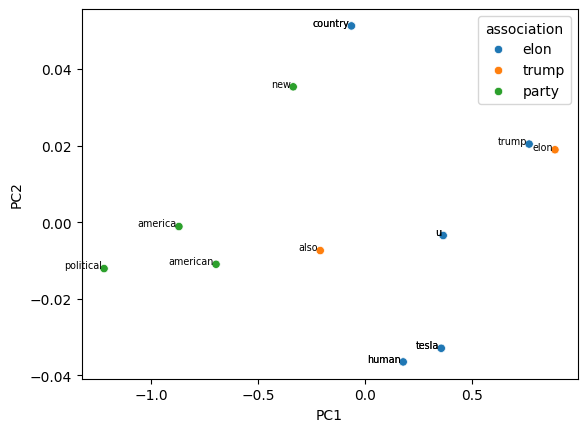

In [40]:
vecs_viz = sns.scatterplot(data=vecs_PCA_df, x='PC1', y='PC2', hue='association')
for idx in range(len(words_to_viz)):
  vecs_viz.text(vecs_PCA_df.PC1[idx] - 0.01, vecs_PCA_df.PC2[idx], vecs_PCA_df.word[idx], horizontalalignment='right',
                size='x-small', color='black', weight='light')
vecs_viz

plt.show()